<a href="https://colab.research.google.com/github/Brentlang/cap-comp215/blob/main/comp_215_sugarscape_final_Brent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sugarscape explained in a comprehensive manner

By: Brent Langford

Date: April 21, 2023


Cell2D and Cell2D related functions thanks to:


*   Powder Flask

Sugarscape model code thanks to: 


*   Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).
*   Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)






In [ ]:

import os
if not os.path.exists('utils.py'):
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py
if not os.path.exists('Cell2D.py'):
  !wget  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/Cell2D.py

!pip install empiricaldist

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from itertools import chain

# from Cell2D import Cell2D, draw_array
from utils import decorate, three_frame, underride
from empiricaldist import Cdf
from statistics import median

from time import sleep
from IPython.display import clear_output



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 

# Table of Contents

*   Sugarscape History

*   Sugarscape Model

*   Cell2D Class

*   Sugarscape 

*   An Example of the Sugarscape Model with replace=True

*   An Example of the Sugarscape Model with replace=False

*   Behaviour exhibited from Sugarscape with no replacing of agents (replace=False)
*   Experiments








# Sugarscape  History

Sugarscape is a model that was proposed by Joshua Epstein and Robert Axtell, Joshua is most recognized for his work in computational social science. Joshua has a PhD in Government from Cornell University. Robert has a Phd in economics from the University of Virginia.


The sugarscape model revolves around the notion of comeption for resources and the inequalities that can result from it. In the model there is an array with different sugar densitys with more sugar concentration in darker coloured zones and as the colour gradient fades so does the sugar concentration. On this array lie agents with differing starting sugar amounts, metabolisms and, vision. The agents for each step of the simulation will look around and locate the highest sugar concentration around them, if there is no agent occupying this location the agent will move there and consume the sugar. 


The model shows us that agents that start on the fringe of the array where there is a minimial amount of sugar concentration will die out much sooner than those born into higher sugar concentration due to their metabolism needs relative to their surrounding environment. 

This model has been used to demonstrate behaviours of various systems including the tendency for wealth/economic inequality, migration, spread of diseases, social network dynamics, and even behaviour of the financial markets.


The model would be more accurate to the Western economy if the agents outside of the highest sugar concentration ring had an increasing metabolism representing inflation which largely represents corporate greed. Where a portion of their metabolism consumption is added to the capacity of the agents within the highest sugar ring concentration. The rises in the metabolism would be suffocating to the agents on the fringe but wouldn't necessarily effect the agents in the dense sugar ring as their sugar income would decrease but they would never come close to starving.

In the real world the metabolism increases by the agents in the highest concentration would represent 35% of inflation on goods and services. This would make people living paycheck to paycheck default on mortgages, loans, miss rent payments, cut back on consumer goods leading to a recession. 



# Sugarscape Model


Sugarscape is a 2d model that is made up of a base of sugar. The 2d model has two areas in opposite diagonal corners that have the highest sugar concentration reaching a maximum value of 4 in concentration these two spots are surrounded by rings of less concentrated sugar reaching a minimum of 1 on the areas furthest from both high concentration spots. The area in between the two high concentration where the rings interlink have a concentration of at least 3.

From there agents are randomly distrubuted throughout the model. 
These agents have multiple characteristics including:
starting sugar, metabolism, vision, age


**1.   Starting Sugar**

*   The agents can start with a sugar value between 5 and 25 
*   This value is then subject to the metabolism rate

**2.   Metabolism**
*   the metabolism of the agent which can be a value of 1,2,3, or 4 
*   This represents the consumption of sugar per step
*   If the agent no longer has sugar stores it dies and is removed from the 2d array and if replace == True, a new agent is born
*   

**3.   Vision**
*   Indicating the radius of what sugar concentrations they can see
*   The distance they can see is randomly distributed from values of 1 to 6 cells in the 2d sugar array.
*   If a cell within the agents vision has a higher concentration of sugar and is not occupied by another agent the agent will migrate to the higher concentration cell.


**4.    Age**

*   Each step represents a passage of time and once the agent reaches a determined mortality age it is removed from the array and a new agent is distributed if the "replace" parameter is set to True



# Different Libraries used


*   matplotlib
*   numpy
*   itertools
*   utils
*   empiricaldist
*   statistics






# Different Coding Practices Used



**Classes**

*   The Sugarscape model itself is a class that uses other classes to represent items in the model for example the agents in the sugarscape model are a class this allows us to give the agents different attributes such as different metabolisms, sugar capacitys, age, as well as vision. 
*   The model utilizes cell2d class to visually represent the model allowing the function to be animated or shown at a specific step



# Cell2D Class


*   The Cell2D class allows us to visually see our model and provides the ability to animate however many steps we want by setting the number of frames to the amount of steps 




In [ ]:
class Cell2D:
    """Parent class for 2-D cellular automata."""

    def __init__(self, n, m=None):
        """Initializes the attributes.
        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.
        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def loop(self, iters=1):
        """Runs the given number of steps."""
        for i in range(iters):
            self.step()

    def draw(self, **options):
        """Draws the array.
        """
        draw_array(self.array, **options)

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.
        
        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step
            
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass
        

def draw_array(array, **options):
    """Draws the cells."""
    n, m = array.shape
    options = underride(options,
                        cmap='Greens',
                        alpha=0.7,
                        vmin=0, vmax=1, 
                        interpolation='none', 
                        origin='upper',
                        extent=[0, m, 0, n])

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, **options)

## Sugarscape

`make_locs` takes the dimensions of the grid and returns an array where each row is a coordinate in the grid.

In [ ]:
def make_locs(n, m):
    """Makes array where each row is an index in an `n` by `m` grid.
    
    n: int number of rows
    m: int number of cols
    
    returns: NumPy array
    """
    t = [(i, j) for i in range(n) for j in range(m)]
    return np.array(t)

Example of make_locs with n=2 and m=3

In [ ]:
make_locs(2, 3)

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])

`make_visible_locs` takes the range of an agents vision and returns an array where each row is the coordinate of a visible cell.

The cells are at increasing distances.  The cells at each distance are shuffled. 

In [ ]:
def make_visible_locs(vision):
    """Computes the kernel of visible cells.
        
    vision: int distance
    """
    def make_array(d):
        """Generates visible cells with increasing distance."""
        a = np.array([[-d, 0], [d, 0], [0, -d], [0, d]])
        np.random.shuffle(a)
        return a
                     
    arrays = [make_array(d) for d in range(1, vision+1)]
    return np.vstack(arrays)

An example of make_visible_locs with a vision = 2

In [ ]:
make_visible_locs(2)

array([[-1,  0],
       [ 0,  1],
       [ 0, -1],
       [ 1,  0],
       [ 0,  2],
       [ 0, -2],
       [-2,  0],
       [ 2,  0]])

`distances_from` returns an array that contains the distance of each cell from the given coordinates.

In [ ]:
def distances_from(n, i, j):
    """Computes an array of distances.
    
    n: size of the array
    i, j: coordinates to find distance from
    
    returns: array of float
    """
    X, Y = np.indices((n, n))
    # The function np.hypot is simply (a^2+b^2)^0.5 in this case a= X-i and b= Y-j 
    return np.hypot(X-i, Y-j)

Provides an example of distances_from where n= 5 , i= 2 , and j= 2

In [ ]:
dist = distances_from(5, 2, 2)
dist

array([[2.82842712, 2.23606798, 2.        , 2.23606798, 2.82842712],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.        , 1.        , 0.        , 1.        , 2.        ],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.82842712, 2.23606798, 2.        , 2.23606798, 2.82842712]])

I use `np.digitize` to set the capacity in each cell according to the distance from the peak.  Here's an example that shows how it works.

In [ ]:
bins = [3, 2, 1, 0]
np.digitize(dist, bins)

array([[1, 1, 1, 1, 1],
       [1, 2, 2, 2, 1],
       [1, 2, 3, 2, 1],
       [1, 2, 2, 2, 1],
       [1, 1, 1, 1, 1]])

Here is Allen Downey's implementation of Sugarscape:

In [ ]:
class Sugarscape(Cell2D):
    """Represents an Epstein-Axtell Sugarscape."""
    
    def __init__(self, n, **params):
        """Initializes the attributes.

        n: number of rows and columns
        params: dictionary of parameters
        """
        self.n = n
        self.params = params
        
        # track variables
        self.agent_count_seq = []
    
        # make the capacity array
        self.capacity = self.make_capacity()
        
        # initially all cells are at capacity
        self.array = self.capacity.copy()
        
        # make the agents
        self.make_agents()
        
    def make_capacity(self):
        """Makes the capacity array."""
        
        # compute the distance of each cell from the peaks. 
        dist1 = distances_from(self.n, 15, 15)
        dist2 = distances_from(self.n, 35, 35)
        dist = np.minimum(dist1, dist2)
        
        # cells in the capacity array are set according to dist from peak
        bins = [21, 16, 11, 6]
        a = np.digitize(dist, bins)
        return a
        
    def make_agents(self):
        """Makes the agents."""
        
        # determine where the agents start and generate locations
        n, m = self.params.get('starting_box', self.array.shape)
        locs = make_locs(n, m)
        np.random.shuffle(locs)

        # make the agents
        num_agents = self.params.get('num_agents', 400)
        assert(num_agents <= len(locs))
        self.agents = [Agent(locs[i], self.params) 
                       for i in range(num_agents)]
        
        # keep track of which cells are occupied
        self.occupied = set(agent.loc for agent in self.agents)
            
    def grow(self):
        """Adds sugar to all cells and caps them by capacity."""
        grow_rate = self.params.get('grow_rate', 1)
        self.array = np.minimum(self.array + grow_rate, self.capacity)
        
    def look_and_move(self, center, vision):
        """Finds the visible cell with the most sugar.
        
        center: tuple, coordinates of the center cell
        vision: int, maximum visible distance
        
        returns: tuple, coordinates of best cell
        """
        # find all visible cells
        locs = make_visible_locs(vision)
        locs = (locs + center) % self.n
        
        # convert rows of the array to tuples
        locs = [tuple(loc) for loc in locs]
        
        # select unoccupied cells
        empty_locs = [loc for loc in locs if loc not in self.occupied]
        
        # if all visible cells are occupied, stay put
        if len(empty_locs) == 0:
            return center
        
        # look up the sugar level in each cell
        t = [self.array[loc] for loc in empty_locs]
        
        # find the best one and return it
        # (in case of tie, argmax returns the first, which
        # is the closest)
        i = np.argmax(t)
        return empty_locs[i]
    
    def harvest(self, loc):
        """Removes and returns the sugar from `loc`.
        
        loc: tuple coordinates
        """
        sugar = self.array[loc]
        self.array[loc] = 0
        return sugar
    
    def step(self):
        """Executes one time step."""
        replace = self.params.get('replace', False)
        
        # loop through the agents in random order
        random_order = np.random.permutation(self.agents)
        for agent in random_order:
            
            # mark the current cell unoccupied
            self.occupied.remove(agent.loc)
            
            # execute one step
            agent.step(self)

            # if the agent is dead, remove from the list
            if agent.is_starving() or agent.is_old():
                self.agents.remove(agent)
                if replace:
                    self.add_agent()
            else:
                # otherwise mark its cell occupied
                self.occupied.add(agent.loc)

        # update the time series
        self.agent_count_seq.append(len(self.agents))
        
        # grow back some sugar
        self.grow()
        return len(self.agents)
    
    def add_agent(self):
        """Generates a new random agent.
                
        returns: new Agent
        """
        new_agent = Agent(self.random_loc(), self.params)
        self.agents.append(new_agent)
        self.occupied.add(new_agent.loc)
        return new_agent
    
    def random_loc(self):
        """Choose a random unoccupied cell.
        
        returns: tuple coordinates
        """
        while True:
            loc = tuple(np.random.randint(self.n, size=2))
            if loc not in self.occupied:
                return loc

    def draw(self):
        """Draws the cells."""
        draw_array(self.array, cmap='YlOrRd', vmax=9, origin='lower')
        
        # draw the agents
        xs, ys = self.get_coords()
        self.points = plt.plot(xs, ys, '.', color='red')[0]
    
    def get_coords(self):
        """Gets the coordinates of the agents.
        
        Transforms from (row, col) to (x, y).
        
        returns: tuple of sequences, (xs, ys)
        """
        agents = self.agents
        rows, cols = np.transpose([agent.loc for agent in agents])
        xs = cols + 0.5
        ys = rows + 0.5
        return xs, ys

Here is Allen's implementation of the agents.

In [ ]:
class Agent:
    
    def __init__(self, loc, params):
        """Creates a new agent at the given location.
        
        loc: tuple coordinates
        params: dictionary of parameters
        """
        self.loc = tuple(loc)
        self.age = 0

        # extract the parameters
        max_vision = params.get('max_vision', 6)
        max_metabolism = params.get('max_metabolism', 4)
        min_lifespan = params.get('min_lifespan', 10000)
        max_lifespan = params.get('max_lifespan', 10000)
        min_sugar = params.get('min_sugar', 5)
        max_sugar = params.get('max_sugar', 25)
        
        # choose attributes
        self.vision = np.random.randint(1, max_vision+1)
        self.metabolism = np.random.uniform(1, max_metabolism)
        self.lifespan = np.random.uniform(min_lifespan, max_lifespan)
        self.sugar = np.random.uniform(min_sugar, max_sugar)

    def step(self, env):
        """Look around, move, and harvest.
        
        env: Sugarscape
        """
        self.loc = env.look_and_move(self.loc, self.vision)
        self.sugar += env.harvest(self.loc) - self.metabolism
        self.age += 1

    def is_starving(self):
        """Checks if sugar has gone negative."""
        return self.sugar < 0
    
    def is_old(self):
        """Checks if lifespan is exceeded."""
        return self.age > self.lifespan

# An Example of the Sugarscape Model with replace=True


* This model has a sugar concentration array of `n=50` (50 by 50 array), as well as starting with 400 agents. 
*   This model runs for 50 steps/iterations

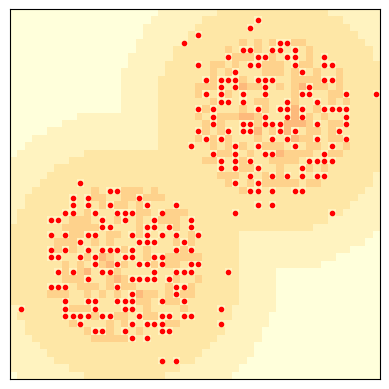

In [ ]:
env = Sugarscape(50, num_agents=400,repalce=True)
env.animate(frames=50)

# An Example of the Sugarscape Model with replace=False


* This model has a sugar concentration array of `n=50` (50 by 50 array), as well as starting with 400 agents which will decrease over time as they are not replaced. 
*   This model runs for 50 steps/iterations

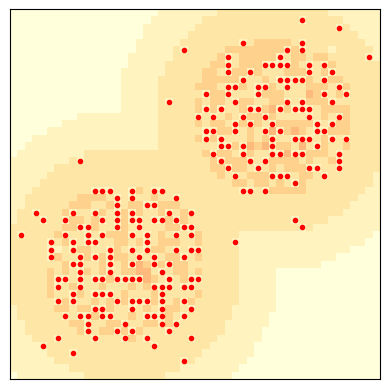

In [ ]:
model_2 = Sugarscape(50, num_agents=400,repalce=False)
model_2.animate(frames=50)

This figure shows the state of the system after 2, 10, and 98 steps.

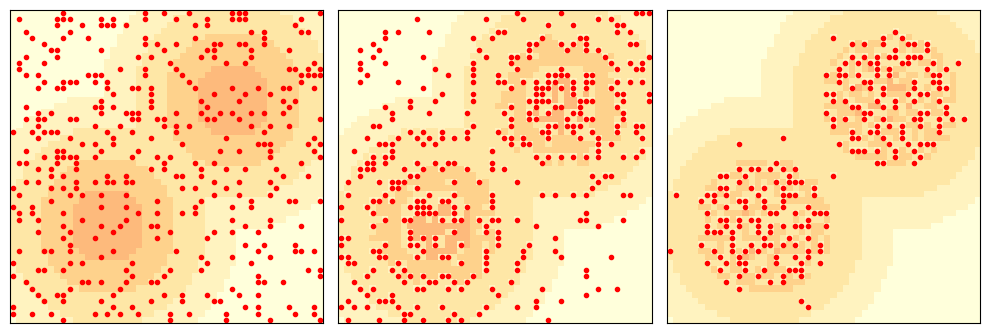

In [ ]:
env = Sugarscape(50, num_agents=400, repalce=False)
three_frame(env, [0, 2, 98])

plt.show('figs/chap10-3')

# Behaviour exhibited from Sugarscape with no replacing of agents (replace=False)



*   We expect the amount of agents will decrease over time as many of the agents metabolism's are too high for their given location, we also expect the sugarscape model to reach equilibrium as agents metabolism's are matched with the surrounding concentrations
*   This can be seen below:



Text(0, 0.5, 'Number of Agents')

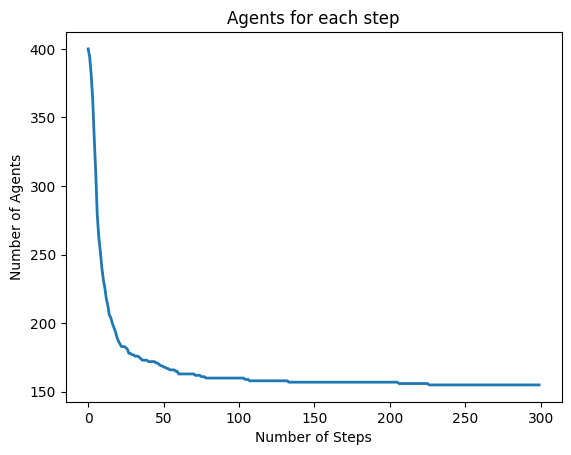

In [ ]:
percent, steps, agents_per_step, rich_agents, avg_neigh= percent_of_3_conc_per(size_array=75,number_agents=400,num_steps=300)
plt.plot(steps, agents_per_step)
plt.title('Agents for each step')
plt.xlabel('Number of Steps')
plt.ylabel('Number of Agents')

# If we log both axis we can see there is an inflection point just before  x = 10^1 

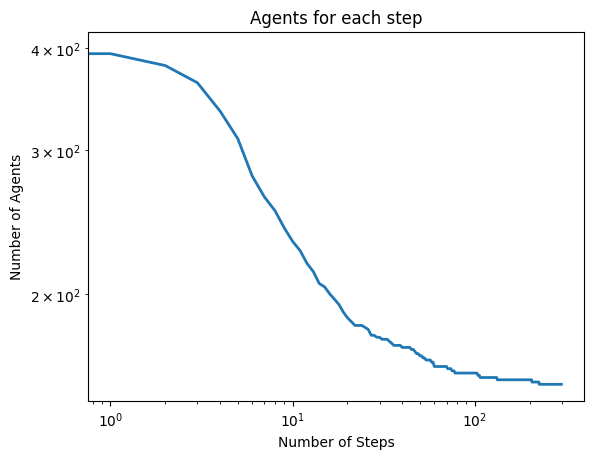

In [ ]:
plt.plot(steps, agents_per_step)
plt.title('Agents for each step')
plt.xlabel('Number of Steps')
plt.ylabel('Number of Agents')
plt.xscale("log")
plt.yscale("log")


## Sugarscape Experiments


 **1. Finding the average number of steps an agent can survive  without consuming more sugar**


*   This requires finding each agents sugar content and metabolism and then dividing the sugar content by the metabolism for each agent. Then summing up all the sugar contents/ metabolisms and dividing that amount by the amount of agents at each step





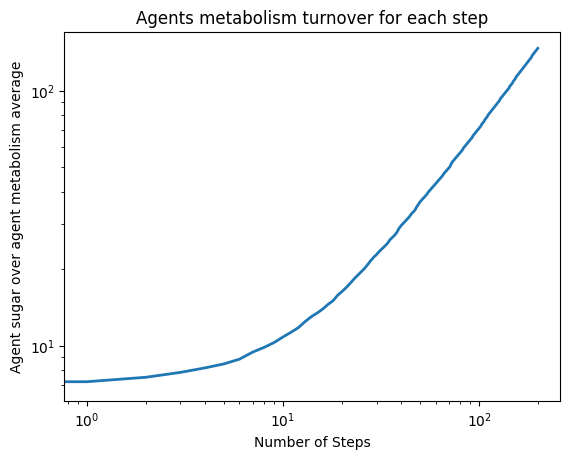

In [ ]:
steps=200
def Sugar_per_metabolism(size_array,number_agents,num_steps,replace):
  Quantity=[]
  
  # Create sugarscape model 
  env= Sugarscape(size_array, num_agents=number_agents, 
                replace=replace)
  # For each step
  for i in range(num_steps):
    env.step()
    # Find the amount of agents
    number_agents=len(env.agents)
    # if there are no more agents end the loop
    if number_agents==0:
      break
    else:
      pass

    Metabolism_turnover=[]
    for agent in env.agents:
      # Find how many steps the agent can go withthout consuming sugar
      Metabolism_turnover.append(agent.sugar/agent.metabolism)
           
    # find the average metabolism turnover for each agent at each step
    Quantity.append((sum(Metabolism_turnover)/number_agents))
         
  return Quantity
plt.plot([i for i in range(steps)],Sugar_per_metabolism(50,250,num_steps=steps,replace=False))
plt.title('Agents metabolism turnover for each step')
plt.xlabel('Number of Steps')
plt.ylabel('Agent sugar over agent metabolism average')
plt.xscale("log")
plt.yscale("log")


    
    


This demonstrates the shift in agents as both they migrate to higher sugar concentrations as well as die off due to poor vision and too high of metabolisms relative to their sugar surroundings.

As steps go by the average number of steps that an agent can go without consuming more sugar increases this means the remaining agents have now reached stability and are no longer pressed for resources.



  **2.How long does it take to achieve a stable sugar neighbour amount and what is it**





In [ ]:
def percent_of_3_conc_per(size_array,number_agents,num_steps):
  Quantity=[]
  Agent_count=[]
  rich_agents=[]
  Average_neighbor_sugar=[]
  # Creates sugarscape model
  env= Sugarscape(size_array, num_agents=number_agents,
                min_lifespan=6000, max_lifespan=100000, 
                replace=False)
  # For each step 
  for i in range(num_steps):
    Agent_max_sugar_neighbor_sum=0
    agents_with_conc_over_3=[]
    
    env.step()
    # Finds the number of agents
    number_agents=len(env.agents)
    # Adds the agent count per step to a list
    Agent_count.append(number_agents)
    
    # For each agent .....
    for agent in env.agents:
      # Finds the agent location
      ag_location=agent.loc

      # Checks if the the array where the agent is located has a concentration
      # greater than or equal to 3 and if that is true adds it to a list
      if env.array[ag_location]>=3:
        # adds the sugar concentration of the agents location if it is greater than 
        # or equal to a concentration of 3
        agents_with_conc_over_3.append(env.array[ag_location])
      
      else:
        pass
      # Each agents vision 
      locs = make_visible_locs(agent.vision)
      locs = (locs + agent.loc) % env.n
      
      # convert rows of the array to tuples
      locs = [tuple(loc) for loc in locs]
      
      # select unoccupied cells
      empty_locs = [loc for loc in locs if loc not in env.occupied]
      
      # look up the sugar level in each cell
      t = [env.array[loc] for loc in empty_locs]

      # find the best concentration and return it
      # (in case of tie, argmax returns the first, which
      # is the closest)
      if sum(t)==0:
        i=0
      else:
        i = np.argmax(t)
      # adds the maximum sugar concentratrion within vision to a list
      Agent_max_sugar_neighbor_sum+=i
    # adds the percent of agents with a sugar concentration >= 3 within their vision to a list
    Quantity.append(len(agents_with_conc_over_3)/number_agents)

    # adds the number of agents with a sugar concentration >=3 in their vision to a list
    rich_agents.append(len(agents_with_conc_over_3))   

    # adds the average max sugar concentration to a list 
    Average_neighbor_sugar.append(Agent_max_sugar_neighbor_sum/len(env.agents))
    

  return Quantity, [ i for i in range(num_steps)],Agent_count, rich_agents,Average_neighbor_sugar

[400, 389, 366, 332, 305, 281, 255, 233, 223, 213, 200, 195, 189, 182, 175, 173, 168, 165, 162, 160, 159, 157, 156, 155, 154, 153, 153, 153, 153, 152, 152, 152, 151, 150, 149, 149, 149, 148, 148, 148, 148, 146, 145, 145, 145, 145, 144, 144, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135,


The proposed experiment requires running the sugarscape model for a specified amount of steps and finding the highest unoccupied sugar concentration within each agents vision for each agent. Adding this amount to a list and summing and then dividing by the number of agents to find the average max concentration that the agents can see. 


This function does have a flaw and that is two agents could be looking at the same unoccupied maximum sugar cell meaning they would be competing and in the next time step only one of them would get it.

Below is the experiment using a differnt amount of agents per trial. The quantities of agents for each trial are 50, 100, 200, 300, 500, and 1,000 for the 6th trial.



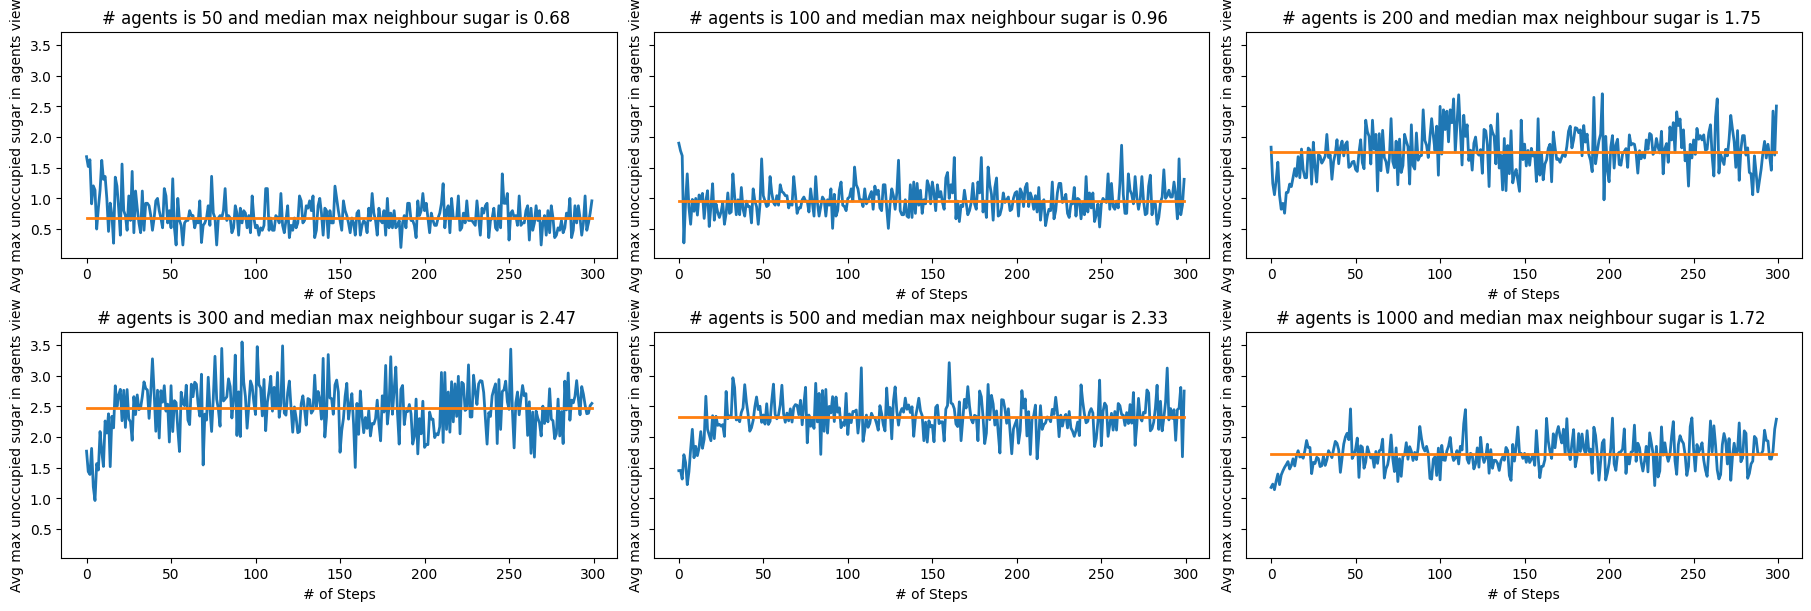

In [ ]:
height_quan=2
width_quan=3
plt.subplots(height_quan, width_quan, figsize=(18, 6),constrained_layout=True,sharey=True)

gs=[50,100,200,300,500,1000]
for plot, g in enumerate(gs):
    plt.subplot(height_quan, width_quan, plot+1)
    
    percent, steps, agents_per_step, rich_agents, avg_neigh= percent_of_3_conc_per(size_array=75,number_agents=g,num_steps=300)
    plt.plot(steps, avg_neigh)
    plt.plot(steps, [median(avg_neigh) for i in steps])

    plt.title(f'# agents is {g} and median max neighbour sugar is {round(median(avg_neigh),2)} ')
    plt.xlabel("# of Steps")
    plt.ylabel("Avg max unoccupied sugar in agents view")

